In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self,k = 5, epochs = 100):
        self.k = k
        self.epochs = epochs

        #indices of each clustures
        self.clusters = [[] for _ in range(self.k)]

        #mean of each cluster
        self.centroids = []

    def predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_samples = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[ind] for ind in random_samples]

        for _ in range(self.epochs):
            self.clusters = self.create_clusters(self.centroids)

            centroids_old = self.centroids
            self.centroids = self.new_centroids(self.clusters)

            if self.is_converged(centroids_old, self.centroids):
                break

        return self.get_cluster_lables(self.clusters)

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx,sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def closest_centroid(self,sample,centroids):
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        return np.argmin(distances)

    def new_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def is_converged(self, old, new):
        distances = [self.euclidean_distance(old[i],new[i]) for i in range(self.k)]
        return sum(distances) == 0

    def get_cluster_lables(self,clusters):
        lables = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                lables[sample_idx] = cluster_idx

        return lables
    
    def euclidean_distance(self,x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

(500, 2)


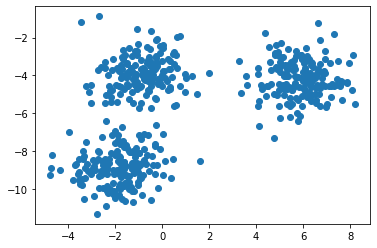

In [3]:
from sklearn.datasets import make_blobs
np.random.seed(42)
X,y = make_blobs(centers=3, n_samples=500,n_features=2, shuffle=True, random_state=40)
print(X.shape)
plt.scatter(X[:,0],X[:,1])

In [4]:
clusters = len(np.unique(y))
print(clusters)
k = KMeans(k=clusters,epochs=1000)
y_pred = k.predict(X)
print(y_pred)


3
[0. 2. 1. 1. 2. 2. 0. 0. 0. 0. 2. 2. 1. 0. 2. 1. 2. 2. 0. 1. 0. 2. 2. 2.
 0. 0. 0. 2. 0. 1. 2. 0. 2. 1. 1. 0. 2. 1. 0. 0. 2. 0. 2. 2. 1. 1. 1. 1.
 2. 2. 1. 1. 0. 1. 1. 2. 1. 2. 1. 2. 0. 1. 2. 0. 1. 0. 0. 2. 2. 1. 1. 0.
 2. 1. 0. 2. 2. 0. 2. 1. 0. 1. 1. 2. 1. 2. 0. 1. 1. 0. 0. 0. 2. 0. 1. 2.
 1. 0. 1. 2. 1. 2. 1. 2. 2. 0. 2. 2. 2. 1. 1. 1. 2. 2. 2. 0. 2. 0. 0. 2.
 1. 1. 2. 1. 2. 0. 1. 2. 2. 2. 2. 1. 1. 1. 2. 0. 2. 1. 2. 2. 0. 1. 2. 0.
 0. 2. 0. 0. 0. 0. 2. 2. 2. 2. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 2. 0. 1. 1.
 2. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 0. 2. 1. 2. 0. 2. 0. 1. 0. 2. 2. 1. 1.
 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 2. 2. 2. 0. 0. 0. 1. 2. 2. 2. 2. 0. 1. 0.
 2. 1. 0. 0. 1. 2. 1. 1. 1. 2. 2. 1. 1. 0. 1. 2. 0. 2. 1. 1. 2. 2. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 2. 2. 1. 1. 0. 1. 2. 2. 2. 2. 2. 2.
 0. 2. 1. 1. 0. 2. 0. 0. 0. 1. 0. 1. 2. 1. 2. 1. 2. 0. 0. 1. 1. 1. 2. 0.
 0. 1. 1. 0. 2. 2. 0. 0. 0. 1. 2. 2. 1. 1. 2. 1. 0. 2. 2. 1. 0. 0. 2. 2.
 2. 0. 2. 1. 1. 2. 0. 0. 2. 0. 0. 0. 0. 2. 0. 1. 

[ 7.42222232 -4.20721581]
[-0.56850285 -3.19724122]
[-2.1800863  -5.39478627]
[[array([ 7.42222232, -4.20721581])], [array([-0.56850285, -3.19724122])], [array([-2.1800863 , -5.39478627])]]
[array([ 7.42222232, -4.20721581]), array([-0.56850285, -3.19724122]), array([-2.1800863 , -5.39478627])]

cluster 0
7.422222324571917 -4.207215812492278
5.349324858444091 -4.032421465981634
7.394873662268694 -4.501492298233567
4.935921162885689 -2.769765685028789
5.00840059185173 -6.241483018692654
6.350339805630337 -5.349411936239951
5.983634696855508 -3.7972290891819798
6.317124541028534 -3.451428093523446
6.107176489836261 -2.5790871505975854
6.51419312763589 -4.161559427948877
3.586940652533363 -4.046340403616473
6.342232578089701 -4.631137492380669
6.07290999537511 -4.807791498690256
7.599913722119684 -4.3141068836992265
4.7573178153375775 -7.32117480836097
4.875447854706087 -5.059131580522403
6.260679923118332 -4.8572757069816195
5.707385765070965 -4.1009607730886595
7.669082248400962 -4.3517

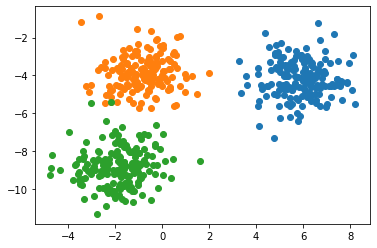

In [5]:
def kmeans(X, k):
    random_samples = np.random.choice(len(X), k, replace=False)
    centroids = []
    for i in random_samples:
        print(X[i])
        centroids.append(X[i])

    clusters = [[i] for i in centroids]
    print(clusters)
    print(centroids)
    for i in X:
        distances = {}
        for idx in range(len(centroids)):
            distances[euclidean_distance(i, centroids[idx])] = idx
        min_dist = min(distances)
        min_idx = distances[min_dist]
        clusters[min_idx].append(i)
        #print(centroids[min_idx],i)
        centroids[min_idx] = (centroids[min_idx]+i)/2
        #print(centroids[min_idx])

    print("\ncluster 0")
    x,y = [],[]
    for i in clusters[0]:
        print(i[0],i[1])
        x.append(i[0])
        y.append(i[1])

    plt.scatter(x,y)

    print("\ncluster 1")
    x,y = [],[]
    for i in clusters[1]:
        print(i[0],i[1])
        x.append(i[0])
        y.append(i[1])

    plt.scatter(x,y)

    print("\ncluster 2")
    x,y = [],[]
    for i in clusters[2]:
        print(i[0],i[1])
        x.append(i[0])
        y.append(i[1])

    plt.scatter(x,y)

    
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))



kmeans(X,3)

(500, 2)


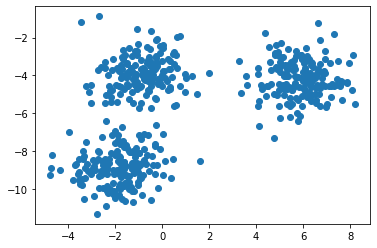

In [6]:
from sklearn.datasets import make_blobs
np.random.seed(42)
X,y = make_blobs(centers=3, n_samples=500,n_features=2, shuffle=True, random_state=40)
print(X.shape)
plt.scatter(X[:,0],X[:,1])